In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 12 16:08:41 2019
 
@author: Single
"""
 
import requests
import urllib
import base64
import time
import re
import json
import rsa
import binascii
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from requests.packages.urllib3.connectionpool import InsecureRequestWarning
 
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
 
header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0',
       'Accept-Encoding': 'gzip, deflate, br',
       'Accept-Language': 'zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Referer': 'https://weibo.com/?sudaref=www.baidu.com&display=0&retcode=6102',
       'Connection': 'keep-alive'
       }
 
class Login(object):
     
    session = requests.session()
    user_name = "u9zyvtnu@bestsoundeffects.com"
    pass_word = "wztraupwbx"
     
    def get_username(self):
        #request.su = sinaSSOEncoder.base64.encode(urlencode(username));
        return base64.b64encode(urllib.parse.quote(self.user_name).encode("utf-8")).decode("utf-8")
     
    def get_pre_login(self):
        #取servertime, nonce,pubkey
        #int(time.time() * 1000)
        params = {
                "entry":    "weibo",
            "callback": "sinaSSOController.preloginCallBack",
            "su":   self.get_username(),
            "rsakt":    "mod",
            "checkpin": "1",
            "client":   "ssologin.js(v1.4.19)",
            "_":    int(time.time() * 1000)
                }
        try:
            response = self.session.post("https://login.sina.com.cn/sso/prelogin.php", params = params, headers = header, verify = False)
            return json.loads(re.search(r"\((?P<data>.*)\)", response.text).group("data"))
        except:
            print("获取公钥失败")
            return 0
     
    def get_password(self):
        #RSAKey.setPublic(me.rsaPubkey, "10001");
        #password = RSAKey.encrypt([me.servertime, me.nonce].join("\t") + "\n" + password)
        public_key = rsa.PublicKey(int(self.get_pre_login()["pubkey"], 16), int("10001", 16))
        password_string = str(self.get_pre_login()["servertime"]) + '\t' + str(self.get_pre_login()["nonce"]) + '\n' + self.pass_word
        return binascii.b2a_hex(rsa.encrypt(password_string.encode("utf-8"), public_key)).decode("utf-8")
     
    def login(self):
         
        post_data = {
                "entry":    "weibo",
                "gateway":  "1",
                "from":"",
                "savestate":    "7",
                "qrcode_flag":  "false",
                "useticket":    "1",
                "vsnf": "1",
                "su":   self.get_username(),
                "service":  "miniblog",
                "servertime":   self.get_pre_login()["servertime"],
                "nonce":    self.get_pre_login()["nonce"],
                "pwencode": "rsa2",
                "rsakv":    self.get_pre_login()["rsakv"],
                "sp":   self.get_password(),
                "sr":   "1536*864",
                "encoding": "UTF-8",
                "prelt":    "529",
                "url":  "https://weibo.com/ajaxlogin.php?framelogin=1&callback=parent.sinaSSOController.feedBackUrlCallBack",
                "returntype":   "TEXT"
                }
         
        login_data = self.session.post("https://login.sina.com.cn/sso/login.php?client=ssologin.js(v1.4.18)", data = post_data, headers = header, verify = False)
        params = {
                "ticket":login_data.json()['ticket'],
                "ssosavestate": int(time.time()),
                "callback": "sinaSSOController.doCrossDomainCallBack",
                "scriptId": "ssoscript0",
                "client":   "ssologin.js(v1.4.19)",
                "_": int(time.time() * 1000)
                }
        self.session.post("https://passport.weibo.com/wbsso/login", params = params, verify = False, headers = header)
        return self.session
         
         
login = Login()
session = login.login()
#     https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user

In [5]:
response = session.post('https://weibo.com',verify = False, headers = header)
soup = BeautifulSoup(response.text,'html.parser')
print(soup.find('title'))
#<title>我的首页 微博-随时随地发现新鲜事</title> 表示登陆成功

<title>我的首页 微博-随时随地发现新鲜事</title>


In [106]:
re.findall(r'[1-9]\d*',soup.text)

['6',
 '8',
 '202006100401',
 '3',
 '6',
 '15',
 '1',
 '1',
 '22',
 '1',
 '21',
 '783',
 '1',
 '2',
 '9',
 '1',
 '1846456085',
 '1006061846456085',
 '6',
 '15',
 '1',
 '1',
 '22',
 '1',
 '21',
 '783',
 '8',
 '7318171391',
 '7318171391',
 '100606',
 '3',
 '300',
 '300',
 '180',
 '7',
 '8',
 '7',
 '308',
 '8',
 '3',
 '1591742451',
 '1591732895000',
 '1591732895',
 '100606',
 '1',
 '1',
 '6',
 '6',
 '6',
 '6',
 '1',
 '2',
 '6',
 '1',
 '2',
 '996',
 '9',
 '26',
 '1',
 '3',
 '1',
 '1',
 '8',
 '1',
 '1',
 '1',
 '2',
 '1',
 '8',
 '3',
 '4',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '31',
 '42',
 '10',
 '3',
 '3',
 '50',
 '9999',
 '2',
 '1',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '5',
 '3',
 '1',
 '2',
 '16',
 '1',
 '1',
 '1',
 '16',
 '996',
 '9',
 '26',
 '1',
 '3',
 '996',
 '9',
 '26',
 '1',
 '3',
 '2',
 '2000',
 '1',
 '5000',
 '1',
 '7318171391',
 '1',
 '6',
 '7318171391',
 '1',
 '6',
 '1',
 '1',
 '1',
 '622',
 '1',
 '55',
 '9',
 '1',
 '88',
 '4',
 '1',
 '6',
 '1',
 '1',
 '1

In [6]:
response = session.post('https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user',verify = False, headers = header)
soup = BeautifulSoup(response.text,'html.parser')
print(soup)


<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<meta content="webkit" name="renderer"/>
<meta content="initial-scale=1,minimum-scale=1" name="viewport"/>
<title>微博搜索</title>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/video.css?version=202006011140" rel="stylesheet"/>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/global.css?version=202006011140" rel="stylesheet"/>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/module.css?version=202006011140" rel="stylesheet"/>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/page.css?version=202006011140" rel="stylesheet"/>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/card.css?version=202006011140" rel="stylesheet"/>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/css_v6/layer/layer_show_pic.css?version=202006011140" rel="stylesheet"/>
<script type="text/javascript">
        var $PHOTO_TAGS=[]
     

In [7]:
soup.find

<bound method Tag.find of <!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<meta content="webkit" name="renderer"/>
<meta content="initial-scale=1,minimum-scale=1" name="viewport"/>
<title>微博搜索</title>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/video.css?version=202006011140" rel="stylesheet"/>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/global.css?version=202006011140" rel="stylesheet"/>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/module.css?version=202006011140" rel="stylesheet"/>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/page.css?version=202006011140" rel="stylesheet"/>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/card.css?version=202006011140" rel="stylesheet"/>
<link href="//img.t.sinajs.cn/t4/appstyle/searchpc/css/pc/css/css_v6/layer/layer_show_pic.css?version=202006011140" rel="stylesheet"/>
<script type="text/javascript">
      

In [8]:
start_url_list = []
final_url = []
def pageNum(num):
    nums = num
    for i in range(nums):
        start_url = 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page='+str(i+1)
        start_url_list.append(start_url)

def getAllUrl():
    for i in soup.find_all('a',attrs = {'class':'wb_url'}):  
        url = 'https://www.weibo.com/'+ str(i['href'].split('/')[-1])
        final_url.append(url)

In [9]:
pageNum(20)

In [10]:
start_url_list

['https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=1',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=2',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=3',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=4',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=5',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=6',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=7',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=8',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=9',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=10',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=11',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=12',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF&Refer=user_user&page=13',
 'https://s.weibo.com/user?q=%E8%85%BE%E8%AE%AF

In [11]:
for i in range(19):
    response = session.post(start_url_list[i],verify = False, headers = header)
    soup = BeautifulSoup(response.text,'html.parser')
    getAllUrl()



In [12]:
final_url

['https://www.weibo.com/tencent',
 'https://www.weibo.com/ilovevideo',
 'https://www.weibo.com/hollywoodtheatre',
 'https://www.weibo.com/weixinteam',
 'https://www.weibo.com/6479255096',
 'https://www.weibo.com/3752699924',
 'https://www.weibo.com/tengxunxinwen',
 'https://www.weibo.com/5203786516',
 'https://www.weibo.com/tengxuntiyu',
 'https://www.weibo.com/2806170583',
 'https://www.weibo.com/6268474301',
 'https://www.weibo.com/3604205173',
 'https://www.weibo.com/5885931990',
 'https://www.weibo.com/6062063357',
 'https://www.weibo.com/tencentpictures',
 'https://www.weibo.com/SOSOmap',
 'https://www.weibo.com/tencentqqmusic',
 'https://www.weibo.com/5688848952',
 'https://www.weibo.com/qqvstar',
 'https://www.weibo.com/remendezongyi',
 'https://www.weibo.com/6510949403',
 'https://www.weibo.com/tencentmobileqq',
 'https://www.weibo.com/tencent131',
 'https://www.weibo.com/tencentmusic',
 'https://www.weibo.com/heromoba',
 'https://www.weibo.com/7229718199',
 'https://www.weibo.

In [63]:
#\\"W_f12\\">83168<
r'\\\\"

'https://www.weibo.com/tencent'

In [28]:
guanzhu = []
fensi = []
weibo = []
name = []
for i in range(99):
    try:
        time.sleep(5)
        response = session.post(final_url[i],verify = False, headers = header)
        soup = BeautifulSoup(response.text,'html.parser')
        guanzhu_start = re.findall(r'[1-9]?\"\>[1-9]\d*\<\\\/[n-t]+',soup.text)[0]
        guanzhu_num =re.findall(r'\d+',guanzhu_start)
        guanzhu.append(int(guanzhu_num[0]))

        fensi_start = re.findall(r'[1-9]?\"\>[1-9]\d*\<\\\/[n-t]+',soup.text)[1]
        fensi_num =re.findall(r'\d+',fensi_start)
        fensi.append(int(fensi_num[0]))

        weibo_start = re.findall(r'[1-9]?\"\>[1-9]\d*\<\\\/[n-t]+',soup.text)[2]
        weibo_num =re.findall(r'\d+',weibo_start)
        weibo.append(int(weibo_num[0]))
        name.append(str(soup.title)[7:-14])
    except:
        print('出现一个错误')

In [21]:
#test
# response = session.post(final_url[0],verify = False, headers = header)
# soup = BeautifulSoup(response.text,'html.parser')
# guanzhu_start = re.findall(r'[1-9]?\"\>[1-9]\d*\<\\\/[n-t]+',soup.text)[0]
# guanzhu_num =re.findall(r'\d+',guanzhu_start)
# guanzhu.append(int(guanzhu_num[0]))

In [212]:
# name

In [213]:
# guanzhu

In [214]:
# # fensi
# import os
# # weibo
# file_path = os.getcwd()

In [88]:
# ts = pd.Series(data['发博数量'].values, index=data[])

In [123]:
# index = data.sort_values(by = '发博数量',ascending=False)[0:5]['']
# ts.sort_values(ascending=False)[0:5]
# # data.sort_values(by = '发博数量',ascending=False)[0:5]['发博数量'].plot.bar(index = '')
# pd.Series(ts).plot.hist()
# # data.plot.bar()

In [193]:
from pandas.core.frame import DataFrame
# a=[1,2,3,4]#列表a
# b=[5,6,7,8]#列表b
final_dic={"微博名称" : name,
           "关注数量" : guanzhu,
            "粉丝数量":fensi,
            "发博数量":weibo
  }#将列表转换成字典
data=DataFrame(final_dic)#将字典转换成为数据框
print(data)

                微博名称  关注数量      粉丝数量   发博数量
0               腾讯公司   165    671621   1064
1               腾讯视频  2921  13374071  83179
2            腾讯视频VIP   684   1844971  22119
3             腾讯微信团队    42    501627   1053
4               腾讯微视   865   1073297   6980
5              腾讯电视剧   518   1406616  21349
6             腾讯新闻出品   312    608258   7961
7               腾讯动漫   867   1209234  15207
8               腾讯体育   345   3243903  43098
9               腾讯新闻   401    653387  14426
10       和陌生人说话-腾讯新闻   257    160746    621
11              腾讯游戏   518   1455705   4691
12             腾讯NBA   267    610982  20509
13              腾讯电竞   938   1124028   6259
14              腾讯影业   454   1604604   4459
15              腾讯地图   419   2035831   8306
16              QQ音乐   310  10055566  41887
17            腾讯微信读书   278    140629   1462
18          腾讯视频doki  1110    319698  11290
19              腾讯综艺  1595   3775576  32898
20         腾讯超级影视VIP   819   1905608   7895
21              腾讯QQ   202    32

## 数据分析过程

In [194]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
#
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('seaborn')
print('ok')

ok


In [195]:
data

,微博名称,关注数量,粉丝数量,发博数量
0,腾讯公司,165,671621,1064
1,腾讯视频,2921,13374071,83179
2,腾讯视频VIP,684,1844971,22119
3,腾讯微信团队,42,501627,1053
4,腾讯微视,865,1073297,6980
5,腾讯电视剧,518,1406616,21349
6,腾讯新闻出品,312,608258,7961
7,腾讯动漫,867,1209234,15207
8,腾讯体育,345,3243903,43098
9,腾讯新闻,401,653387,14426


In [196]:
plt.rcParams['font.sans-serif'].insert(0,'Heiti TC') #中文字体加入

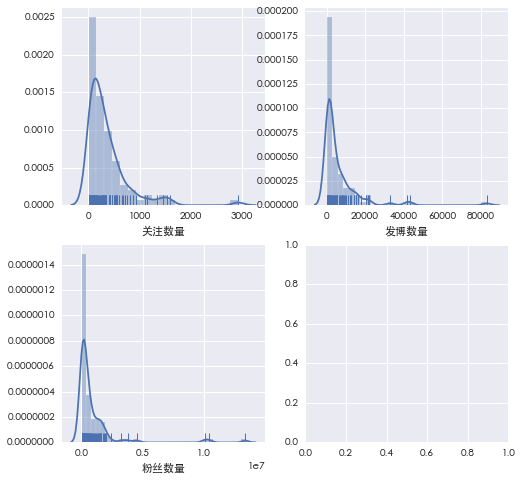

In [197]:
fig , axes = plt.subplots(2,2, figsize = (8,8))
# 
sns.distplot(data['关注数量'],rug = True,ax = axes[0][0])
sns.distplot(data['粉丝数量'],rug = True,ax = axes[1][0])
sns.distplot(data['发博数量'],rug = True,ax = axes[0][1])
# data.发博数量.sort_values(ascending = False)[0:20].plot.barh()

Text(0.5, 0, '发博数量')

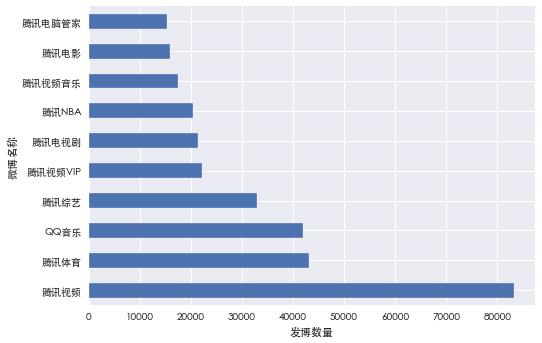

In [198]:
data.index = data['微博名称']
# fig , axes = plt.subplots(1,1, figsize = (8,8))

data.发博数量.sort_values(ascending = False)[0:10].plot.barh()
plt.xlabel('发博数量')


Text(0.5, 0, '粉丝数量')

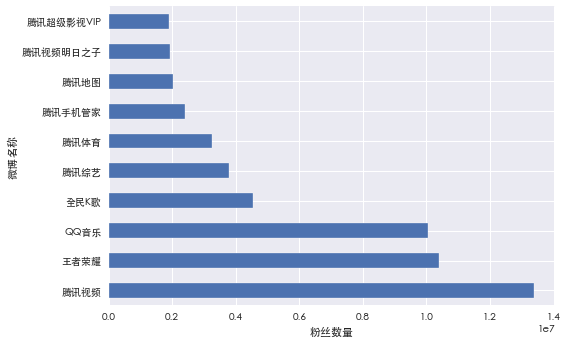

In [199]:
data.粉丝数量.sort_values(ascending = False)[0:10].plot.barh()
plt.xlabel('粉丝数量')

In [127]:
# sns.boxplot(data = data['粉丝数量'])
# data.plot.bar()
# import pandas as pd
# pd.sort_values("粉丝数量",inplace=True,data = data )
# data.to_csv('data.csv',encoding='utf-8')
# data.to_csv('data1.csv',encoding="utf_8_sig")
# data['粉丝数量'].barplot()
# # data.to_csv(data, encoding='utf-8', index=False)

In [191]:
# response = session.post(str(final_url[0]+str('?profile_ftype=1&is_all=1#_0')),verify = False, headers = header)
# soup = BeautifulSoup(response.text,'lxml',from_encoding='utf-8')
# #取出 关注数 粉丝数 微博数 微博名称
# # <h1 class=\\"username\\">腾讯视频<\\/h1>
# soup.text
#5月13日 18:58
#一图看懂腾讯2020年Q1财报 ↓ 划重点：抗疫持续加码，收入增长稳定<br><br>大家还能发现其他亮点不？评论区见
#6月3日 18:44
# #腾讯HR摆地摊招聘#<\\/a>，急招各类人才，没有中间商薅鹅毛。等你来投简历
#3月18日 17:05
# 有一个好消息和一个坏消息<br>好消息是：<br>微信入选《财富》“现代最伟大的设计TOP100“，排在第31名。<br>榜单上一次发布还是1959年，为纪念创办60年，再次开启百大评选。<br>《财富》杂志给微信的获奖理由：<br>集成了一系列必不可少的移动应用，微信已经成为用户的一站式商店。这是一款让我们的生活变得更简单的


In [192]:
# username_start = re.findall(r'[n][a][m][e]\\\"\>[\u4e00-\u9fa5]+',soup.text)[0]
# username_content = re.findall(r'[\u4e00-\u9fa5]+',username_start)
# username_content

In [31]:
# re.findall(r'[1-9]?\"\>[1-9]\d*\<\\\/[n-t]+',soup.text)

In [190]:
# weibo_start = re.findall(r'[1-9]?\"\>[1-9]\d*\<\\\/[n-t]+',soup.text)[2]
# weibo_num =re.findall(r'\d+',weibo_start)